In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

**Reading images from Train data**

In [2]:
folder_name_list=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

for name in folder_name_list:
    folder_path = './train/'+name
    list_name = name
    globals()[list_name] = []
    # train_label =[]

    for filename in os.listdir(folder_path):
        # Check if the file is an image
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Read the image file
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            # Add the image to the list
            if img is not None:
                globals()[list_name].append((img.flatten(),name))
                
                

In [3]:
train_Data = airplane+automobile+bird+cat+deer+dog+frog+horse+ship+truck

In [4]:
train_Data

[(array([197, 202, 200, ..., 238, 236, 236], dtype=uint8), 'airplane'),
 (array([108, 117, 120, ...,  89, 110, 118], dtype=uint8), 'airplane'),
 (array([249, 245, 255, ...,   8, 121, 107], dtype=uint8), 'airplane'),
 (array([255, 255, 252, ..., 252, 252, 252], dtype=uint8), 'airplane'),
 (array([47, 69, 44, ..., 42, 65, 43], dtype=uint8), 'airplane'),
 (array([158, 146, 142, ...,  65,  86,  87], dtype=uint8), 'airplane'),
 (array([231, 231, 231, ...,  95,  95,  95], dtype=uint8), 'airplane'),
 (array([ 55,  94, 109, ..., 163, 166, 171], dtype=uint8), 'airplane'),
 (array([186, 143, 100, ..., 215, 219, 224], dtype=uint8), 'airplane'),
 (array([176, 163, 171, ...,  22,  92,  86], dtype=uint8), 'airplane'),
 (array([3, 5, 0, ..., 2, 2, 0], dtype=uint8), 'airplane'),
 (array([233, 225, 218, ...,  61,  62,  58], dtype=uint8), 'airplane'),
 (array([182, 155,  91, ..., 105, 106, 102], dtype=uint8), 'airplane'),
 (array([196, 178, 167, ..., 109,  97,  91], dtype=uint8), 'airplane'),
 (array([1

In [5]:
train_labels=[]
data_train = []
for instance in train_Data:
   train_labels.append(instance[1])
   data_train.append(instance[0])

In [6]:
data_train = np.array(data_train)

In [7]:
type(data_train)

numpy.ndarray

In [8]:
data_train.shape

(50000, 3072)

In [9]:
data_train[5000]

array([192, 180, 168, ...,  81,  77,  72], dtype=uint8)

**Reading images from Test data**

In [10]:
folder_name_list=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

for name in folder_name_list:
    folder_path = './test/'+name
    list_name = name
    globals()[list_name] = []

    for filename in os.listdir(folder_path):
        # Check if the file is an image
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Read the image file
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            # Add the image to the list
            if img is not None:
                globals()[list_name].append((img.flatten(),name))

In [11]:
test_Data = airplane+automobile+bird+cat+deer+dog+frog+horse+ship+truck

In [12]:
test_labels=[]
data_test = []
for instance in test_Data:
   test_labels.append(instance[1])
   data_test.append(instance[0])

In [13]:
data_test = np.array(data_test)

In [14]:
data_test.shape

(10000, 3072)

In [15]:
import random

In [26]:
X_train = data_train
X_test = data_test
y_train = train_labels
y_test = test_labels


In [28]:
len(y_train)

50000

**KNN with L1 distance**

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
classifier_l1 = KNeighborsClassifier(n_neighbors=3, p=1)
classifier_l1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, p=1)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [32]:
y_pred = classifier_l1.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)

In [34]:
accuracy

0.3623

In [54]:
y_pred.shape

(1000,)

In [56]:
len(y_test)

1000

In [22]:
labels=[]

for i in range(len(train_labels)):
    if train_labels[i]=='airplane':
        labels.append(1)
    if train_labels[i]=='automobile':
        labels.append(2)
    if train_labels[i]=='bird':
        labels.append(3)
    if train_labels[i]=='cat':
        labels.append(4)
    if train_labels[i]=='deer':
        labels.append(5)
    if train_labels[i]=='dog':
        labels.append(6)
    if train_labels[i]=='frog':
        labels.append(7)
    if train_labels[i]=='horse':
        labels.append(8)
    if train_labels[i]=='ship':
        labels.append(9)
    if train_labels[i]=='truck':
        labels.append(10)

In [23]:
labels = np.array(labels)

**5 fold validation with L2 distance**

In [24]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
dataset = data_train

k_choices = [3,5,7,9,11] 

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True)
accuracies2 = []
k_to_accuracies_L2= {}


for k in k_choices:
    k_to_accuracies_L2[k] = []
    for train_index, test_index in kf.split(dataset):

        X_train, X_test = dataset[train_index], dataset[test_index]
        y_train, y_test = labels[train_index], labels[test_index]

        knn = KNeighborsClassifier(n_neighbors=k, p=2)
        knn.fit(X_train, y_train)

        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies2.append(accuracy)
        k_to_accuracies_L2[k].append(accuracy)

print("Printing our 5-fold accuracies for varying values of k (L2- Eucladian Distance):")
print()
for k in sorted(k_to_accuracies_L2):
    for accuracy in k_to_accuracies_L2[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

Printing our 5-fold accuracies for varying values of k (L1- Eucladian Distance):

k = 3, accuracy = 0.320200
k = 3, accuracy = 0.330000
k = 3, accuracy = 0.319900
k = 3, accuracy = 0.319500
k = 3, accuracy = 0.332200
k = 5, accuracy = 0.335800
k = 5, accuracy = 0.331000
k = 5, accuracy = 0.334100
k = 5, accuracy = 0.331100
k = 5, accuracy = 0.331600
k = 7, accuracy = 0.336000
k = 7, accuracy = 0.335700
k = 7, accuracy = 0.330900
k = 7, accuracy = 0.324000
k = 7, accuracy = 0.337800
k = 9, accuracy = 0.322600
k = 9, accuracy = 0.335100
k = 9, accuracy = 0.330700
k = 9, accuracy = 0.338000
k = 9, accuracy = 0.329400
k = 11, accuracy = 0.337300
k = 11, accuracy = 0.335200
k = 11, accuracy = 0.324800
k = 11, accuracy = 0.325200
k = 11, accuracy = 0.325200


**Plot of accuracies of different k for 5 folds**

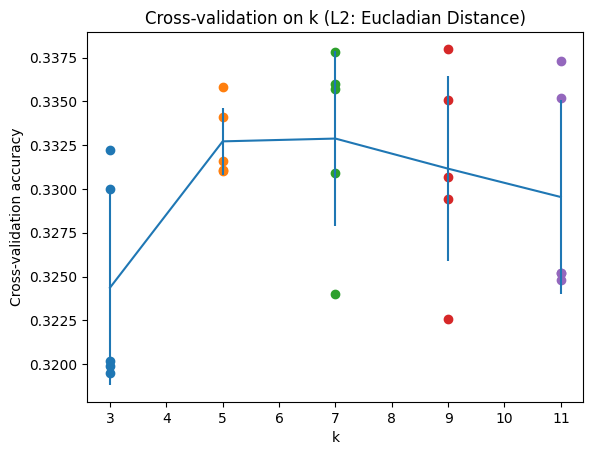

In [25]:
for k in k_choices:
    accuracies2 = k_to_accuracies_L2[k]
    plt.scatter([k] * len(accuracies2), accuracies2)

accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies_L2.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies_L2.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k (L2: Eucladian Distance)')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

**Discussion**
At first, images were read from train folder while checking there's no broken images. Then each images of each classes were stored in a tuple of the same class name where first element was the flatten 1-d array of the image and 2nd element was the co-responsing class name. Then all tuples of the classes were concated together. Then, two list was created where arrays of the images stored in one and the labels were stored in another. Then they were converted into numpy array. Same steps were conducted with test data. Then knn was applied with L1 distance and here the value of k was 3. Then knn was applied with different values of k and with spliting the training data into 5 folds. Lastly, the variations of accuracies were shown by ploting them. I tried to plot the accuracies for dofferent folds with L1 distance too. But it took so much time for computing in this way and even after an hour it hadn't finished computing. I also tried to use all cores of cpu and looked for other solutions to increase the performance. But it requires using of Tensorflow to increase performance by using cuda.